In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import copy
import numpy as np
%matplotlib inline

In [ ]:
# G = (V = V0 U V1, E = E1 U E2)
E1 = [('a1', 'b1'), ('a1', 'b2'), ('a2', 'b2'), ('a2', 'b3'), ('a3', 'b1'), ('a3', 'b4'), ('a4', 'b1'), ('a4', 'b2'), ('a4', 'b4')]
E2 = copy.deepcopy(E1)
E2.reverse()
E = E1 + E2
cardinality_V0 = 4
cardinality_V1 = 4

# G_bar = (V_bar = {0} U V U {d}, E_bar = E1 U {(o, j)| j \in V0} U {(i, d)| i \in V1})
V_bar = ['o'] + [f'a{i}' for i in range(1, 4 + 1)] + [f'b{i}' for i in range(1, 4 + 1)] + ['d']

E_bar = [("o", f"a{i}") for i in range(1, 4 + 1)] + E1 + [(f'b{i}', 'd') for i in range(1, 4 + 1)]
n_nodes_G_bar = 1 +  cardinality_V0 + cardinality_V1 + 1
W_e = np.zeros((n_nodes_G_bar,) *2)

for e in E_bar:
    # W_e[V_bar.index(e[0])][V_bar.index(e[1])] = cardinality_V0 + 1 if e in E1 else 1
    W_e[V_bar.index(e[0])][V_bar.index(e[1])] = 1 if e in E1 else 1


print(W_e)

[[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
DG = nx.DiGraph()

In [ ]:
for e in E_bar:
    DG.add_edge(e[0], e[1], capacity=W_e[V_bar.index(e[0])][V_bar.index(e[1])])

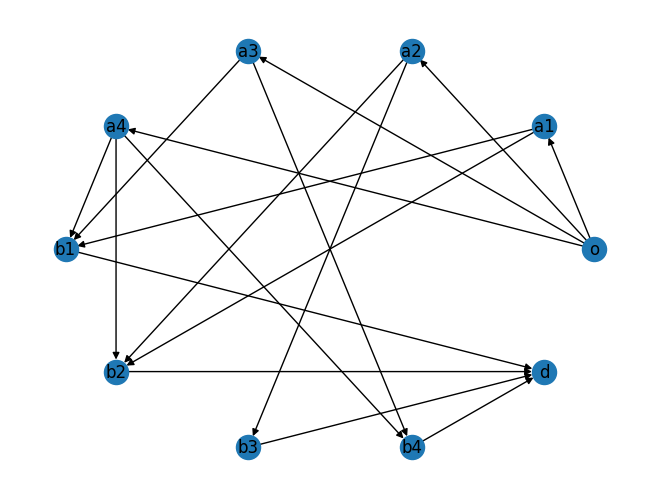

In [ ]:
nx.draw_circular(DG, with_labels=True)

In [ ]:
flow_value, flow_dict = nx.maximum_flow(DG, "o", "d")

In [ ]:
flow_dict

{'o': {'a1': 1.0, 'a2': 1.0, 'a3': 1.0, 'a4': 1.0},
 'a1': {'b1': 0, 'b2': 1.0},
 'a2': {'b2': 0, 'b3': 1.0},
 'a3': {'b1': 1.0, 'b4': 0},
 'a4': {'b1': 0, 'b2': 0, 'b4': 1.0},
 'b1': {'d': 1.0},
 'b2': {'d': 1.0},
 'b3': {'d': 1.0},
 'b4': {'d': 1.0},
 'd': {}}

In [ ]:
F = [(v1, v2) for v1 in flow_dict for v2 in flow_dict[v1] if flow_dict[v1][v2] == 1 and v1 != 'o' and v2 != 'd']
F

[('a1', 'b2'), ('a2', 'b3'), ('a3', 'b1'), ('a4', 'b4')]

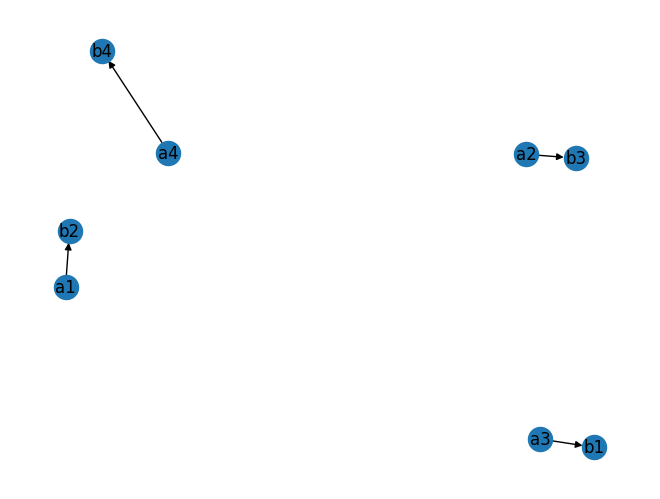

In [ ]:
nx.draw(nx.DiGraph(F), with_labels = True)
